<a href="https://colab.research.google.com/github/HarsukhSagri/ClassifyMeister/blob/main/YOLO_v9t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ultralytics opencv-python-headless matplotlib easyocr

In [3]:
import json
import os
from PIL import Image

In [4]:
import os

# Paths for images and annotations
json_dir_train = '/content/drive/MyDrive/dataset/annotations/train'
json_dir_val = '/content/drive/MyDrive/dataset/annotations/val'
image_dir_train = '/content/drive/MyDrive/dataset/images/train'
image_dir_val = '/content/drive/MyDrive/dataset/images/val'
output_dir_train = '/content/drive/MyDrive/dataset/output/yolo/train'
output_dir_val = '/content/drive/MyDrive/dataset/output/yolo/val'

# Create the directories if they don't exist
os.makedirs(output_dir_train, exist_ok=True)
os.makedirs(output_dir_val, exist_ok=True)

# Define the classes
classes = ['Name', 'DOB', 'Gender', 'AadhaarNumber']


In [5]:
# Convert JSON annotations to YOLO format
def convert_to_yolo_format(json_path, image_path, output_dir, classes):
    with open(json_path, 'r') as f:
        data = json.load(f)

    image_width = data['image_size']['width']
    image_height = data['image_size']['height']

    yolo_annotations = []
    for item in data['annotations']:
        if item['label'] in classes:
            class_id = classes.index(item['label'])
            xmin = item['coordinates']['xmin']
            ymin = item['coordinates']['ymin']
            xmax = item['coordinates']['xmax']
            ymax = item['coordinates']['ymax']

            # Convert to YOLO format
            x_center = (xmin + xmax) / 2 / image_width
            y_center = (ymin + ymax) / 2 / image_height
            width = (xmax - xmin) / image_width
            height = (ymax - ymin) / image_height

            yolo_annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")

     # Save to output directory
    base_name = os.path.splitext(os.path.basename(json_path))[0]
    yolo_file_path = os.path.join(output_dir, base_name + '.txt')
    with open(yolo_file_path, 'w') as f:
        f.write('\n'.join(yolo_annotations))

    # Copy image to output directory
    image_output_path = os.path.join(output_dir, os.path.basename(image_path))
    if not os.path.exists(image_output_path):
        os.system(f'cp {image_path} {output_dir}')

In [6]:
# Convert annotations for training set
for json_file in os.listdir(json_dir_train):
    if json_file.endswith('.json'):
        json_file_path = os.path.join(json_dir_train, json_file)
        image_file = json_file.replace('.json', '.jpg')  # Adjust the extension if necessary
        image_file_path = os.path.join(image_dir_train, image_file)
        if os.path.exists(image_file_path):
            convert_to_yolo_format(json_file_path, image_file_path, output_dir_train, classes)
        else:
            print(f"Image file not found: {image_file_path}")

# Convert annotations for validation set
for json_file in os.listdir(json_dir_val):
    if json_file.endswith('.json'):
        json_file_path = os.path.join(json_dir_val, json_file)
        image_file = json_file.replace('.json', '.jpg')  # Adjust the extension if necessary
        image_file_path = os.path.join(image_dir_val, image_file)
        if os.path.exists(image_file_path):
            convert_to_yolo_format(json_file_path, image_file_path, output_dir_val, classes)
        else:
            print(f"Image file not found: {image_file_path}")

In [7]:
# Define dataset YAML file
data_yaml = """
train: /content/drive/MyDrive/dataset/output/yolo/train
val: /content/drive/MyDrive/dataset/output/yolo/val

nc: 4
names: ['Name', 'DOB', 'Gender', 'AadhaarNumber']
"""

with open("custom_data1.yaml", "w") as f:
    f.write(data_yaml)


In [8]:
from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO('yolov9t.pt')

# Train the model
model.train(data='custom_data1.yaml', epochs=30)

100%|██████████| 4.74M/4.74M [00:00<00:00, 314MB/s]


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=custom_data1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 70.2MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7872  ultralytics.nn.modules.block.ELAN1           [32, 32, 32, 16]              
  3                  -1  1     18560  ultralytics.nn.modules.block.AConv           [32, 64]                      
  4                  -1  1     65216  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 64, 64, 32, 3]           
  5                  -1  1     55488  ultralytics.nn.modules.block.AConv           [64, 96]                      
  6                  -1  1    145824  ultralytics.nn.modules.block.RepNCSPELAN4    [96, 96, 96, 48, 3]           
  7                  -1  1    110848  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 273MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/output/yolo/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:07<00:00, 52.24it/s] 


train: New cache created: /content/drive/MyDrive/dataset/output/yolo/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/dataset/output/yolo/val... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:01<00:00, 54.01it/s]


val: New cache created: /content/drive/MyDrive/dataset/output/yolo/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.06G      2.034      3.836      1.316        106        640: 100%|██████████| 25/25 [00:21<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all        100        400    0.00832      0.575      0.238      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.69G      1.089      1.658     0.9107        104        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        100        400          1      0.227      0.931      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.71G      1.001      1.077     0.8916        126        640: 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        100        400          1      0.273      0.949      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.74G      1.015      0.958     0.8863        102        640: 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        100        400      0.986      0.881      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.71G     0.9928     0.9018     0.8808        114        640: 100%|██████████| 25/25 [00:13<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        100        400      0.989      0.992      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.71G     0.8418     0.8166     0.8693        182        640: 100%|██████████| 25/25 [00:13<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        100        400      0.995       0.99      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.71G     0.8421     0.7777     0.8642        137        640: 100%|██████████| 25/25 [00:19<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        100        400      0.997      0.991      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.71G     0.8284     0.7441     0.8524        111        640: 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        100        400      0.995      0.998      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.71G     0.7666     0.7092     0.8562        140        640: 100%|██████████| 25/25 [00:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        100        400      0.999      0.996      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.71G     0.7302     0.6738     0.8486        114        640: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        100        400      0.998      0.997      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.71G     0.6856     0.6416     0.8457        145        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        100        400      0.998      0.997      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.71G     0.7352     0.6307     0.8436        109        640: 100%|██████████| 25/25 [00:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        100        400      0.998      0.998      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.71G     0.6817     0.6058     0.8495        120        640: 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        100        400      0.997      0.999      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.71G     0.6484     0.5849     0.8439        125        640: 100%|██████████| 25/25 [00:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        100        400      0.998      0.999      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.71G     0.6401      0.573     0.8361        152        640: 100%|██████████| 25/25 [00:21<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        100        400      0.998      0.999      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.71G     0.6589     0.5626     0.8398        108        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]


                   all        100        400      0.997          1      0.995      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.71G     0.6471     0.5527     0.8404        100        640: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        100        400      0.998          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.71G     0.6198     0.5343     0.8343        121        640: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]


                   all        100        400      0.997      0.998      0.995      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.73G     0.6119     0.5169     0.8345        144        640: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        100        400      0.999      0.996      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.71G     0.6184     0.5179     0.8303        159        640: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        100        400      0.998          1      0.995       0.85


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.99G     0.5867     0.5607     0.8102         64        640: 100%|██████████| 25/25 [00:20<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100        400      0.999      0.993      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.69G      0.577     0.5289       0.81         64        640: 100%|██████████| 25/25 [00:15<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        100        400      0.996          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.69G     0.5698     0.5072     0.8084         64        640: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        100        400      0.997      0.999      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.69G      0.571     0.5089     0.8048         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        100        400      0.998          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.68G     0.5455     0.4942     0.8059         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        100        400      0.997          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.68G     0.5311     0.4812      0.804         64        640: 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100        400      0.997          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.69G     0.5246     0.4744      0.805         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        100        400      0.997          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.69G     0.5218     0.4628     0.8016         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        100        400      0.997          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.68G      0.491     0.4521     0.7945         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


                   all        100        400      0.998          1      0.995      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.69G     0.4978     0.4447     0.8002         64        640: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        100        400      0.998          1      0.995      0.891



30 epochs completed in 0.182 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 4.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9t summary (fused): 486 layers, 1971564 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


                   all        100        400      0.997          1      0.995      0.892
                  Name        100        100      0.997          1      0.995      0.866
                   DOB        100        100      0.996          1      0.995      0.881
                Gender        100        100      0.996          1      0.995      0.882
         AadhaarNumber        100        100          1          1      0.995      0.938
Speed: 0.3ms preprocess, 8.1ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e4754bd1780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [16]:
import os
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'


In [4]:
!pip install opencv-python-headless
!pip install pytesseract
!pip install easyocr
!pip install imgaug


In [7]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,431 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [8]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Adjust path as necessary



0: 640x640 1 Name, 1 DOB, 1 Gender, 1 AadhaarNumber, 9.3ms
1: 640x640 1 Name, 1 DOB, 1 Gender, 1 AadhaarNumber, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Image 0: Detected 4 boxes
Box: [     146.37      239.28      317.18      255.58], Label: AadhaarNumber
Box: [     188.47      145.02      220.74      155.85], Label: Gender
Box: [     275.32      124.93       346.5      136.16], Label: DOB
Box: [     149.43      95.845      266.98       110.2], Label: Name
AadhaarNumber: 1913 24272 5050
Gender: Male
DOB: 19/08/1976.
Name: Deborah Delancey


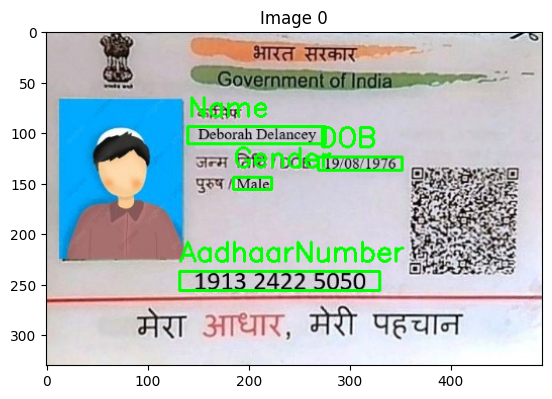

Image 1: Detected 4 boxes
Box: [     438.04      276.69      613.31      304.21], Label: Name
Box: [     648.73      324.72      763.95      344.86], Label: DOB
Box: [     493.13      343.15      573.46      360.89], Label: Gender
Box: [      380.9      456.83      663.16      477.93], Label: AadhaarNumber
Name: Martin Lipford
DOB: 05/01/1981
Gender: Female
AadhaarNumber: 9949 9119 J617


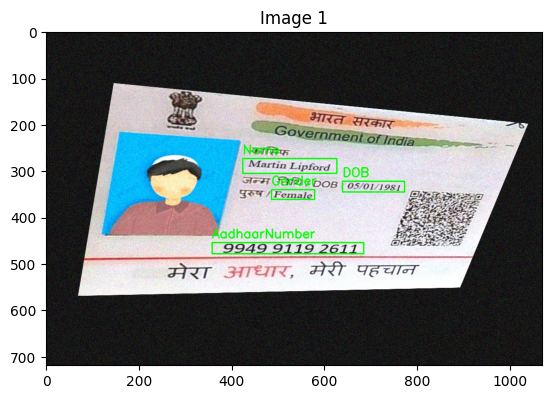

In [8]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pytesseract

# Specify tesseract path (adjust as necessary)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Load the trained YOLOv9t model
model = YOLO('runs/detect/train/weights/best.pt')

# List of images
image_paths = ['/content/drive/MyDrive/dataset/images/val/aadhaar_410.jpg', '/content/drive/MyDrive/dataset/images/val/aadhaar_438.jpg']

# Run detection on a list of images
results = model(image_paths)

# Define margin percentage (e.g., 5%)
margin_percent = 0.08

for i, result in enumerate(results):
    # Load the original image
    image = cv2.imread(image_paths[i])

    # Extract the Boxes object
    boxes_obj = result.boxes

    if boxes_obj is not None:
        # Extract bounding boxes and class IDs
        boxes = boxes_obj.xyxy.cpu().numpy()  # Bounding box coordinates
        class_ids = boxes_obj.cls.cpu().numpy()  # Class IDs
        labels = [result.names[int(cls)] for cls in class_ids]

        # Debugging: Print detected boxes and labels
        print(f"Image {i}: Detected {len(boxes)} boxes")
        for box, label in zip(boxes, labels):
            print(f"Box: {box}, Label: {label}")

        # Draw bounding boxes
        for box, label in zip(boxes, labels):
            x1, y1, x2, y2 = box[:4]

            # Calculate margin
            margin_x = (x2 - x1) * margin_percent
            margin_y = (y2 - y1) * margin_percent

            # Expand the bounding box by the margin
            x1 = max(0, x1 - margin_x)
            y1 = max(0, y1 - margin_y)
            x2 = min(image.shape[1], x2 + margin_x)
            y2 = min(image.shape[0], y2 + margin_y)

            # Draw the expanded bounding box
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Crop the detected field with margin
            cropped_img = image[int(y1):int(y2), int(x1):int(x2)]

            # Use Tesseract OCR to read text from the cropped field
            text = pytesseract.image_to_string(cropped_img, config='--psm 6')

            # Print the extracted text
            print(f'{label}: {text.strip()}')

    else:
        print(f"No detections in image {i}")

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i}")
    plt.show()


In [9]:
import shutil

# Define source paths
yolov9t_path = '/content/yolov9t.pt'
train_folder_path = '/content/runs/detect/train'

# Define destination paths in Google Drive
drive_yolov9t_path = '/content/drive/MyDrive/yolov9t.pt'
drive_train_folder_path = '/content/drive/MyDrive/train'

# Copy the file
shutil.copy(yolov9t_path, drive_yolov9t_path)

# Copy the folder
shutil.copytree(train_folder_path, drive_train_folder_path)

print("Files and folders have been copied to Google Drive.")


Files and folders have been copied to Google Drive.
